In [94]:
import tensorflow as tf
import os,pathlib
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt




In [95]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
(X_train, y_train), (X_test, y_test) = cifar10.load_data()



In [96]:
X_train.shape,y_train.shape,X_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3))

In [97]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [98]:
labels=['airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck']

### plot first feagures of cifar10 dataset

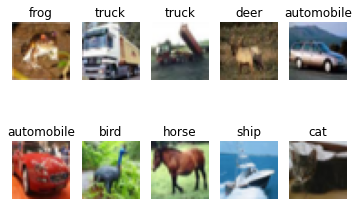

In [99]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(labels[y_train[i][0]])

### preprocessing 

In [100]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [102]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### split data to validation and train 

In [103]:
Xvalid = X_train[-10000:]
yvalid = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]
Xvalid.shape,yvalid.shape,X_train.shape,y_train.shape

((10000, 32, 32, 3), (10000, 10), (40000, 32, 32, 3), (40000, 10))

### build MLP model

#### It's better to choose 2/3 of dim(input+output) for the count of layer neurons

In [71]:
def model_builder():
    inputs = keras.Input(shape=(32, 32, 3,))
    x = layers.experimental.preprocessing.Rescaling(1./255,offset=0.0)(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='CIFAR10_MLP')
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model

In [72]:
model=model_builder()

Model: "CIFAR10_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_6 (Rescaling)      (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 10)                

In [74]:
MODEL_DIR = pathlib.Path('./models/')

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_32.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=32,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)

Epoch 1/30
938/938 [==============================] - 8s 8ms/step - loss: 1.7226 - accuracy: 0.3848 - val_loss: 2.1123 - val_accuracy: 0.3419
Epoch 2/30
938/938 [==============================] - 7s 8ms/step - loss: 1.7212 - accuracy: 0.3814 - val_loss: 1.7360 - val_accuracy: 0.3841
Epoch 3/30
938/938 [==============================] - 7s 8ms/step - loss: 1.7206 - accuracy: 0.3829 - val_loss: 1.7622 - val_accuracy: 0.3606
Epoch 4/30
938/938 [==============================] - 7s 8ms/step - loss: 1.7199 - accuracy: 0.3848 - val_loss: 1.8011 - val_accuracy: 0.3627
Epoch 5/30
938/938 [==============================] - 7s 7ms/step - loss: 1.7243 - accuracy: 0.3825 - val_loss: 1.8422 - val_accuracy: 0.3597
Epoch 6/30
938/938 [==============================] - 7s 8ms/step - loss: 1.7232 - accuracy: 0.3838 - val_loss: 1.8515 - val_accuracy: 0.3166
Epoch 7/30
938/938 [==============================] - 7s 8ms/step - loss: 1.7132 - accuracy: 0.3850 - val_loss: 1.8206 - val_accuracy: 0.3623
Epoch 

In [75]:
def plot_history(history):
    
    fig = plt.figure(figsize=(10, 10))

    epochs = range(1, len(history.history['accuracy']) + 1)

    plt.subplot(2, 1, 1)
    plt.plot(epochs, history.history['loss'], 'r', label='Training loss')
    plt.plot(epochs, history.history['val_loss'], 'b',
             label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(epochs, history.history['accuracy'], 'r',
             label='Training accuracy')
    plt.plot(epochs, history.history['val_accuracy'], 'b',
             label='Validation accracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

    plt.show()

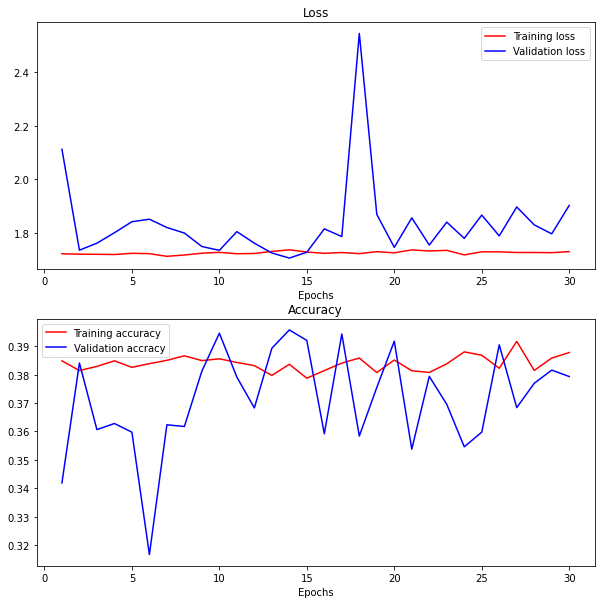

In [76]:
plot_history(history)

## Evaluate model 

In [82]:
def evaluation(model, X_test, y_test):

    (test_loss,
     test_acc) = model.evaluate(X_test, y_test)
    print('Test accuracy:', test_acc)

    predictions = model.predict(X_test)

    confussion_matrix =tf.math.confusion_matrix(
        labels=y_test.argmax(axis=1),
        predictions=predictions.argmax(axis=1))
        

    print('Confussion matrix is :',confussion_matrix)
 


In [83]:
model = keras.models.load_model(
    os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_32.keras'))

evaluation(model, X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.6727 - accuracy: 0.4007
Test accuracy: 0.40070000290870667
Confussion matrix is : tf.Tensor(
[[449  66  13  54  71   4  33  25 230  55]
 [ 23 503   9  33  44   5  43  15 153 172]
 [141  32  60 114 329  22 144 102  40  16]
 [ 38  29  29 291 165  45 243  51  66  43]
 [ 45  11  13 107 515   8 166  80  37  18]
 [ 35  16  24 292 181 123 130  86  81  32]
 [  7  20   6 110 207  13 573  23  19  22]
 [ 41  44  12  99 216  29  51 391  41  76]
 [119  71   4  33  49   3   9  11 639  62]
 [ 34 198   2  41  30   4  49  23 156 463]], shape=(10, 10), dtype=int32)


## try out various batchsizes

Epoch 1/30
469/469 [==============================] - 4s 10ms/step - loss: 2.0231 - accuracy: 0.2538 - val_loss: 1.8303 - val_accuracy: 0.3494
Epoch 2/30
469/469 [==============================] - 4s 9ms/step - loss: 1.8372 - accuracy: 0.3356 - val_loss: 1.8150 - val_accuracy: 0.3577
Epoch 3/30
469/469 [==============================] - 4s 9ms/step - loss: 1.7521 - accuracy: 0.3658 - val_loss: 1.7821 - val_accuracy: 0.3606
Epoch 4/30
469/469 [==============================] - 4s 9ms/step - loss: 1.6967 - accuracy: 0.3875 - val_loss: 1.6805 - val_accuracy: 0.3973
Epoch 5/30
469/469 [==============================] - 4s 9ms/step - loss: 1.6585 - accuracy: 0.4022 - val_loss: 1.6938 - val_accuracy: 0.3891
Epoch 6/30
469/469 [==============================] - 4s 10ms/step - loss: 1.6281 - accuracy: 0.4153 - val_loss: 1.6704 - val_accuracy: 0.3989
Epoch 7/30
469/469 [==============================] - 4s 9ms/step - loss: 1.5978 - accuracy: 0.4242 - val_loss: 1.6020 - val_accuracy: 0.4256
Epoc

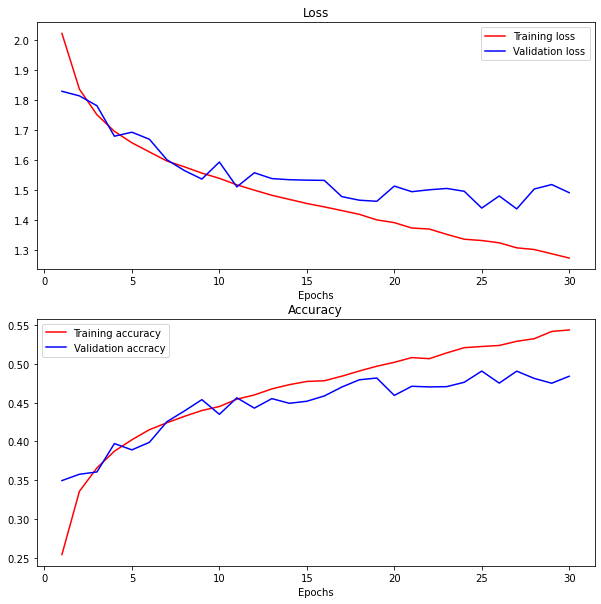

313/313 [==============================] - 0s 1ms/step - loss: 1.4057 - accuracy: 0.5041
Test accuracy: 0.5041000247001648
Confussion matrix is : tf.Tensor(
[[560  19  41  17  42  24  35  65 124  73]
 [ 33 504  11  21  13  26  25  44  67 256]
 [ 72  16 268  65 179  94 161 110  21  14]
 [ 21  10  52 228  94 238 188  97  23  49]
 [ 54   7  80  38 459  51 155 117  22  17]
 [ 19   4  43 138  92 428 121 113  18  24]
 [  6   9  34  44 104  48 684  39  11  21]
 [ 17   4  12  44  78  86  42 659  11  47]
 [132  33  12  17  27  24  19  32 608  96]
 [ 32 100   8  20  12  27  28  69  61 643]], shape=(10, 10), dtype=int32)


In [87]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)
plot_history(history)
model = keras.models.load_model(
    os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64.keras'))

evaluation(model, X_test, y_test)

Epoch 1/30
118/118 [==============================] - 2s 18ms/step - loss: 1.2313 - accuracy: 0.5657 - val_loss: 1.4465 - val_accuracy: 0.4900
Epoch 2/30
118/118 [==============================] - 2s 17ms/step - loss: 1.2176 - accuracy: 0.5618 - val_loss: 1.4413 - val_accuracy: 0.4930
Epoch 3/30
118/118 [==============================] - 2s 17ms/step - loss: 1.2016 - accuracy: 0.5695 - val_loss: 1.4748 - val_accuracy: 0.4845
Epoch 4/30
118/118 [==============================] - 2s 17ms/step - loss: 1.1895 - accuracy: 0.5758 - val_loss: 1.4816 - val_accuracy: 0.4820
Epoch 5/30
118/118 [==============================] - 2s 16ms/step - loss: 1.1855 - accuracy: 0.5737 - val_loss: 1.4806 - val_accuracy: 0.4823
Epoch 6/30
118/118 [==============================] - 2s 18ms/step - loss: 1.1703 - accuracy: 0.5799 - val_loss: 1.4146 - val_accuracy: 0.5015
Epoch 7/30
118/118 [==============================] - 2s 16ms/step - loss: 1.1647 - accuracy: 0.5829 - val_loss: 1.4671 - val_accuracy: 0.4844

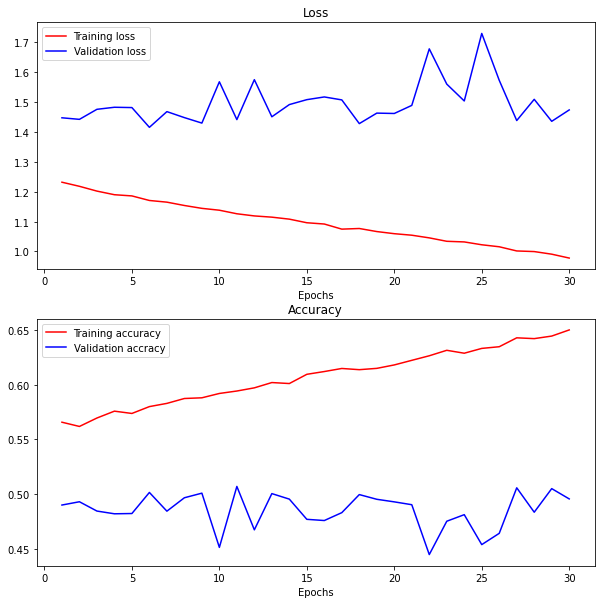

313/313 [==============================] - 0s 1ms/step - loss: 1.3876 - accuracy: 0.5108
Test accuracy: 0.5108000040054321
Confussion matrix is : tf.Tensor(
[[529  39  23  44  57  14  32  38 143  81]
 [ 22 626  10  42  14   6  21  25  48 186]
 [ 71  29 206 152 232  46 128  95  22  19]
 [ 16  16  30 445  87 101 171  68  24  42]
 [ 38  12  56  91 535  22 111  95  24  16]
 [ 10  13  47 310 108 248 122  91  31  20]
 [  4  12  24  84 131  17 656  30  12  30]
 [ 20  21  24  96  95  38  36 600  14  56]
 [ 94  67   8  35  36   2  19  14 636  89]
 [ 31 159   5  42  12  13  26  46  39 627]], shape=(10, 10), dtype=int32)


In [88]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_256.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=256,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)
plot_history(history)
model = keras.models.load_model(
    os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_256.keras'))

evaluation(model, X_test, y_test)

## try out various activate functions

Model: "CIFAR10_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_10 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_32 (Dense)             (None, 10)                

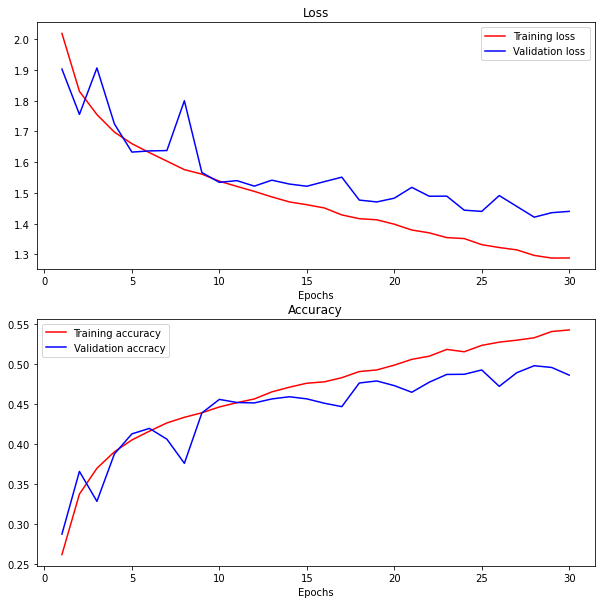

313/313 [==============================] - 1s 2ms/step - loss: 1.4206 - accuracy: 0.4932
Test accuracy: 0.49320000410079956
Confussion matrix is : tf.Tensor(
[[612  47  94  15  42   7  30  13  96  44]
 [ 45 644  26  14  20  10  24  18  39 160]
 [ 86  30 461  66 144  45  99  31  19  19]
 [ 31  30 143 288  98 134 174  35  26  41]
 [ 63  14 206  44 483  20 102  40  17  11]
 [ 32  18 151 175 115 307 113  42  28  19]
 [ 11  23 114  44 157  23 594  18   7   9]
 [ 45  22  89  58 157  69  42 452  10  56]
 [178  89  23  22  41  11  18  10 555  53]
 [ 56 209  14  36  34   9  28  25  53 536]], shape=(10, 10), dtype=int32)


In [91]:
def model_builder():
    inputs = keras.Input(shape=(32, 32, 3,))
    x = layers.experimental.preprocessing.Rescaling(1./255,offset=0.0)(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='sigmoid')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(512, activation='sigmoid')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='CIFAR10_MLP')
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model
model=model_builder()
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64_sigmoid.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)
plot_history(history)
# model = keras.models.load_model(
#     os.path.join(
#         MODEL_DIR, 'CIFAR10_MLP_batch_64_sigmoid.keras'))

evaluation(model, X_test, y_test)

Model: "CIFAR10_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_11 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_11 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_35 (Dense)             (None, 10)                

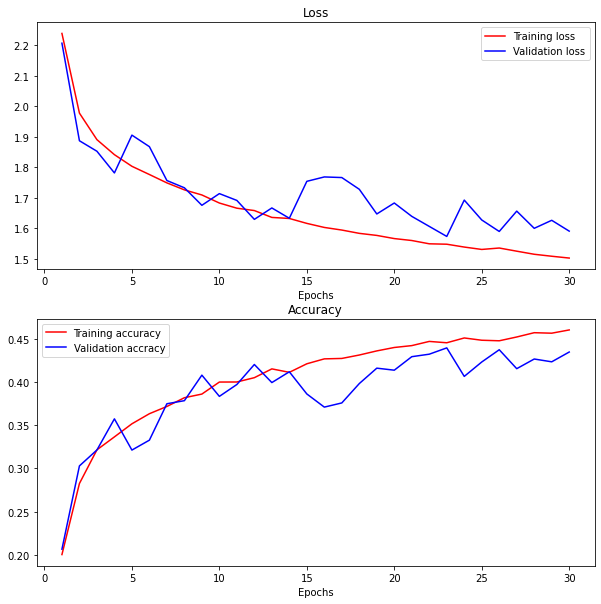

313/313 [==============================] - 1s 2ms/step - loss: 1.5653 - accuracy: 0.4362
Test accuracy: 0.43619999289512634
Confussion matrix is : tf.Tensor(
[[642  89  19   3  60   8  50  30  75  24]
 [ 54 652  15   8  21  24  43  36  34 113]
 [143  36 219  30 247  51 144 102  19   9]
 [ 58  51  87 130 114 186 238  89  18  29]
 [ 95  17 115  15 423  37 146 128  15   9]
 [ 40  27  93  72 114 320 187 114  17  16]
 [ 16  18  62  20 181  33 611  42   8   9]
 [ 88  38  41  19  91  51  73 548  12  39]
 [205 161  10  12  30  30  29  14 463  46]
 [ 66 342  12  14  24  20  73  47  48 354]], shape=(10, 10), dtype=int32)


In [92]:
def model_builder():
    inputs = keras.Input(shape=(32, 32, 3,))
    x = layers.experimental.preprocessing.Rescaling(1./255,offset=0.0)(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='tanh')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(512, activation='tanh')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='CIFAR10_MLP')
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model
model=model_builder()
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64_tanh.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)
plot_history(history)

evaluation(model, X_test, y_test)

## try out another loss function

Model: "CIFAR10_MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
rescaling_12 (Rescaling)     (None, 32, 32, 3)         0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               786688    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                

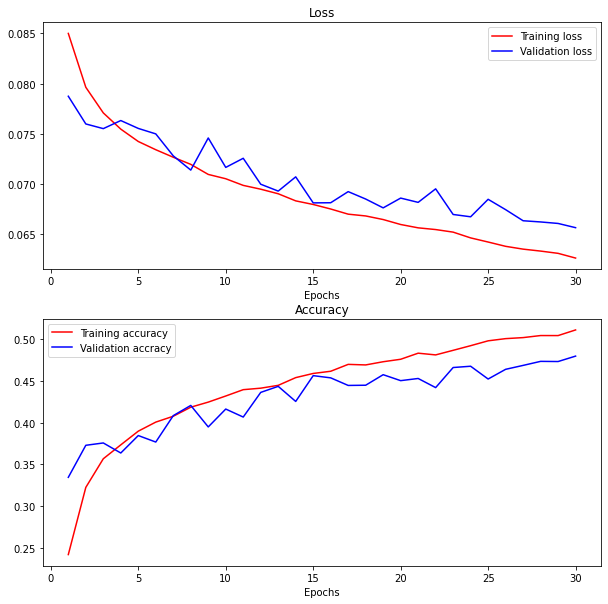

313/313 [==============================] - 0s 1ms/step - loss: 1.5561 - accuracy: 0.4427
Test accuracy: 0.44269999861717224
Confussion matrix is : tf.Tensor(
[[476  99  78  37  46  17   8  72 108  59]
 [ 29 686  27  36  14  23   6  35  26 118]
 [ 75  48 393 129 161  56  22  81  20  15]
 [ 27  48 114 420  79 129  39  69  19  56]
 [ 58  28 204 118 423  25  25  90  16  13]
 [ 19  30 130 283  85 281  28  86  28  30]
 [  8  27 164 194 228  58 254  31   8  28]
 [ 24  53  75  94 104  59  15 518   9  49]
 [102 156  22  44  22  11   2  27 499 115]
 [ 37 295   9  50  14  17  11  59  31 477]], shape=(10, 10), dtype=int32)


In [93]:
def model_builder():
    inputs = keras.Input(shape=(32, 32, 3,))
    x = layers.experimental.preprocessing.Rescaling(1./255,offset=0.0)(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='sigmoid')(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(512, activation='sigmoid')(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs=inputs,
                        outputs=outputs,
                        name='CIFAR10_MLP')
    model.compile(loss='mse',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    model.summary()
    return model
model=model_builder()
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64_sigmoid_mse.keras'),
        save_best_only=True,
        monitor="val_loss")
]

history = history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=64,
                    validation_data=(Xvalid, yvalid),
                    epochs=30,
                    callbacks=callbacks,
                    shuffle=True)
plot_history(history)
model = keras.models.load_model(
    os.path.join(
        MODEL_DIR, 'CIFAR10_MLP_batch_64_tanh.keras'))

evaluation(model, X_test, y_test)